In [10]:
!pip install numpy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import Adam
from keras.preprocessing import image
import os
import shutil
import pandas as pd

In [20]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3),activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3),activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = "adam",metrics = ["accuracy"])

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 54, 54, 64)       

In [22]:
train_gen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

val_gen = image.ImageDataGenerator(
    rescale = 1./255
)

In [23]:
train_path = "../covid19datasete/train/"
val_path = "../covid19datasete/val/"

In [24]:
train_generator = train_gen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
)
val_generator = val_gen.flow_from_directory(
    val_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary",
)

Found 1516 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [25]:
train_generator.class_indices

{'COVID': 0, 'NORMAL': 1}

In [26]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//32,
    epochs=20,
    validation_data = val_generator,
    validation_steps =2,
    shuffle=True,
)

Epoch 1/20
47/47 [==============================] - 330s 7s/step - loss: 0.4325 - accuracy: 0.8673 - val_loss: 0.8234 - val_accuracy: 0.2222
Epoch 2/20
47/47 [==============================] - 328s 7s/step - loss: 0.2832 - accuracy: 0.8976 - val_loss: 1.2797 - val_accuracy: 0.6944
Epoch 3/20
47/47 [==============================] - 333s 7s/step - loss: 0.1549 - accuracy: 0.9420 - val_loss: 0.6537 - val_accuracy: 0.7778
Epoch 4/20
47/47 [==============================] - 330s 7s/step - loss: 0.0810 - accuracy: 0.9677 - val_loss: 0.1891 - val_accuracy: 0.9167
Epoch 5/20
47/47 [==============================] - 330s 7s/step - loss: 0.1037 - accuracy: 0.9596 - val_loss: 1.3769 - val_accuracy: 0.8889
Epoch 6/20
47/47 [==============================] - 330s 7s/step - loss: 0.1358 - accuracy: 0.9420 - val_loss: 0.6428 - val_accuracy: 0.9444
Epoch 7/20
47/47 [==============================] - 335s 7s/step - loss: 0.0907 - accuracy: 0.9688 - val_loss: 0.2264 - val_accuracy: 0.9167
Epoch 8/20
47

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


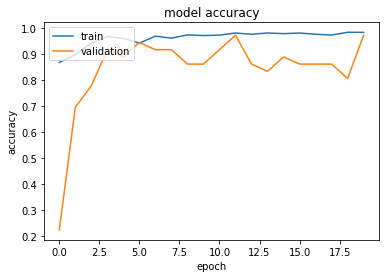

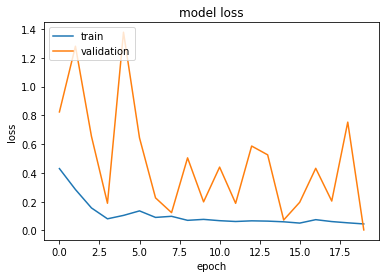

In [27]:
print(hist.history.keys())
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#"loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [29]:
model.save('model.hdf5')